# Modelisation d'une epidemie de maladie infectieuse, le modele SIR et la peste d'Eyam

### Cedric Chauve, LaBRI et Simon Fraser University
### cedric.chauve@u-bordeaux.fr, cedric.chauve@sfu.ca
 
Cette activite a pour but d'introduire des notionsd e programmation de base en python et Jupyter, en se basant sur la programmation d'un modele classique d'evolutuion d'une maladie infectieuse dans une population, le modele SIR. Le modele developpe sera applique a l'analyse d'une epidemie de peste bubonique dans le village d'Eyam, en Angleterre au XVIIeme siecle. 
Du point de vue informatique, cette activite permet de manipuler des structures de controle et de donnees simples (boucles, boucles imbriquees, tableaux, dictionnaires) et de developper une petite interface graphique.

In [1]:
# Modules

import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Widgets & Display modules, etc..
from ipywidgets import widgets as w
from ipywidgets import Button, Layout, widgets
from IPython.display import display, Javascript, Markdown

# grid features for interactive grids 
grid_features = { 'fullWidthRows': True,
                  'syncColumnCellResize': True,
                  'forceFitColumns': True,
                  'rowHeight': 40,
                  'enableColumnReorder': True,
                  'enableTextSelectionOnCells': True,
                  'editable': True,
                  'filterable': False,
                  'sortable': False,
                  'highlightSelectedRow': True}

## Le modele SIR

Le modele SIR est utilise pour simuler et predire l'evolution de la part d'une population donnee infectee par une *maladie infectieuse*, comme la grippe, la peste ou la tuberculose par exemple.

### Description generale du modele

Le modele SIR (pour Susceptible, Infected, Removed, il s'agit donc d'un acronyme anglophone) suppose que la population affectee par une epidemie d'une maladie infectieuse se decompose en trois sous-populations.
- **S.** Les individus *susceptibles* d'etre infectes : ils ne sont pas infectes, mais peuvent le devenir par contact avec un individu infecte.
- **I.** Les individus *infectes* par le pathogene.
- **R.** Les individus *retablis* : ils ne sont ni infectes, ni susceptibles d'etre infectes. Cette partie de la population contient les individus qui ont ete infectes et ne le sont plus soit car ils ont gueri (et sont immunises) soit car ils sont morts.  

Ce modele suppose de plus que la population reste de *taille constante N*, c'est-a-dire que le nombre d'invidus de la population (individus decedes compris) ne change pas au cours de l'epidemie. Il s'agit d'une hypothese qui se justifie dans le cas d'une population dans un environnement ferme (ville en quarantaine par exemple).

Dans le modele SIR, on s'interesse a la *l'evolution de la distribution* des *N* individus de la population au cours d'une periode de temps. On suppose qu'a une date de depart, il y a quelques individus infectes et on se pose la question suivante : apres un laps de temps donne, combien d'individus infectes, susceptibles et retablis observe-t'on dans la population? 

Si l'epidemie en cours suit bien un modele SIR, pouvoir repondre a cette question permet de prendre une decision sur les actions a mener pour contenir l'epidemie. Par exemple, si le modele SIR predit qu'apres un mois il n'y a plus d'individus infectes et une proportion impotante d'individus susceptibles, on peut juger qu'il n'est pas necessaire de faire quoi que ce soit; au contraire, si le modele predit qu'apres un mois une grande partie de la population est infectee, alors on peut decider de mettre en place tres vite des mesures d'isolation des individus infectes pour juguler l'epidemie.

### Description mathematique du modele

On mesure le passage du temps de maniere discrete, on considere donc des intervalles de temps fixes (par exemple une semaine) et on s'interesse au nombre d'individus de chaque type apres une semaine, puis deux semaine, ...

Pour cela on denote par *t* le nombre d'intervalles de temps qui se sont ecolues depuis la decouverte du premier cas d'infection:
- $t=0$ correspond au debut de l'epidemie;
- $t=1$ correspond a l'etat de la population apres un intervalle de temps (dans notre exemple, apres une semaine);
- $t=2$ correspond a l'etat de la population apres deux intervalles de temps (dans notre exemple, apres deux semaines);
- ...

On denote par
- $I(t)$ le nombre d'individus infectes apres $t$ intervalles de temps;
- $S(t)$ le nombre d'individus susceptibles apres $t$ intervalles de temps;
- $R(t)$ le nombre d'individus retablis apres $t$ intervalles de temps.

De par l'hypothese de population constante, on a donc $N=S(t)+I(t)+R(t)$ pour toute valeur entiere non-negative de $t$.

Le but du modele SIR est de pouvoir calculer, a partir du triplet $(S(t),I(t),R(t))$ le triplet $(S(t+1),I(t+1),R(t+1))$, c'est-a-dire de pouvoir predire l'etat de la population un intervalle de temps plus tard.

Ce modele necessite de connaitre deux parametres.
- Le *taux dinfection* $\beta$, qui indique la proportion de contacts entre un individu infecte et un individu susceptible resultant en l'individu susceptible devenant infecte.
- Le *taux de retablissement* $\gamma$ qui indique la proportion d'individus infectes qui se retablissent ou meurent durant un intervalle de temps.

Cela donne le modele mathematique (systeme dynamique) suivant :
$$
\begin{align}
S(t+1) &= S(t) -  {\beta} S(t)I(t)/N\\
I(t+1) &= I(t) +  {\beta} S(t)I(t)/N - \gamma I(t) \\
R(t+1) &= R(t) + \gamma I(t)\\
\end{align}
$$

### Remarques

Le parametre $\gamma$ doit etre compris entre $0$ et $1$. Il est en general aise a determiner : si la maladie prend $\lambda$ intervalles de temps pour suivre son cours chez un individu, alors $\gamma=1/\lambda$. Le modele SIR syppose implicitement que tout individu infecte le restera pour une periode de $1/\gamma$ intervalles de temps, i.e. ne se retablira pas plus vite.

Le parametre $\beta$ est difficile a obtenir au debut d'une epidemie, mais on en connait de bonnes approximations pour la plupart des maladies infectieuses courantes.

## Activite 1.

Ecrire une fonction *discrete_SIR* en python qui prend en entree
- S0,I0,R0 = $S(0),I(0),R(0)$,
- beta (parametre $\beta$),
- gamma (parametre $\gamma$),
- t_max, nombre d'intervalles de temps de l'epidemie
et calcule trois tableaux (dictionaires) S, I, R de t_max+1 entrees chacun tels que S[t]=$S(t)$, I[t]=$I(t)$, R[t]=$R(t)$.

In [71]:
# This function takes as input a vector y holding all initial values,
#    t_max the number of time points
#    beta: beta parameter of the SIR 
#    gamma: gamma parameter of the SIR
#    S0,I0,R0 = initial values

def discrete_SIR(S0,I0,R0,t_max,beta,gamma):
    # Empy arrays for each class
    S = {t: 0 for t in range(0,t_max+1)}
    I = {t: 0 for t in range(0,t_max+1)}
    R = {t: 0 for t in range(0,t_max+1)}
    
    # Append initial values
    S[0],I[0],R[0] = S0,I0,R0
    N = S0+I0+R0
    
    # Apply SIR model: iterate over the total number of time points
    for t in range(0,t_max):
        S[t+1] = S[t] - (beta*S[t]*I[t]/N)
        I[t+1] = I[t] + (beta*S[t]*I[t]/N) - (gamma*I[t])
        R[t+1] = R[t] + (gamma*I[t])
    
    return((S,I,R))

### Visualisation

Ecrire une fonction *plot_SIR* qui prend en entree
- S,I,R = trois dictionnaires modelisant l'evolution d'une epidemie,
- size1, size2 = taille d'un graphique,
- time = description de l'unite de temps,
- title = titre de la figure,
et graphe l'evolution d'une epidemie decrite par les tableaux S,I,R.

In [60]:
# This function takes as input initial values of susceptible, infected and removed, number of days, beta and gamma
# it plots the SIR model with the above conditions
def plot_SIR(S,I,R,title):
    
    # Initialize figure
    fig = plt.figure(facecolor='w',figsize=(17,5))
    ax  = fig.add_subplot(111,facecolor = '#ffffff')
    
    # Set x axis
    x = S.keys()
   
    # Plot of evolution of susceptible over the course of |x| time points
    plt.plot(x,S.values(),'go--',c= 'b',label='Susceptible')
    # Plot of evolution of infected over the course of |x| time points
    plt.plot(x,I.values(),'go--',c='r',label='Infectes')
    # Plot of evolution of removed over the course of |x| time points
    plt.plot(x,R.values(),'go--',c='g',label='Retablis')

    # Make the plot pretty
    plt.xlabel('Temps (jours)')
    plt.ylabel('Population (proportion)')
    plt.title(title)
    legend = ax.legend()
    plt.show()
    

### Application

Appliquer les deux fonctions precedentes a l'analyse des epidemies suivantes :
- grippe, $\beta=0.6,\ \lambda = 6$ (la maladie dure 6 jours), t_max = 90;
- grippe peu virulente, $\beta=0.15,\ \lambda = 6$ (6 jours), t_max = 90;
- rougeole, $\beta=0.8,\ \lambda = 20$ (20 jours), t_max = 90;
- grippe de Hong-Kong (1968-1969), $\beta=0.5,\ \lambda = 3$ (3 jours), t_max = 90;
- peste de Bombay (1905-1906), $\beta=0.0273,\ \lambda = 56.2$ (56.2 jours), t_max = 600.  

Dans tous les cas on suppose que $N=1000, S(0)=990$ et $I(0)=10$.

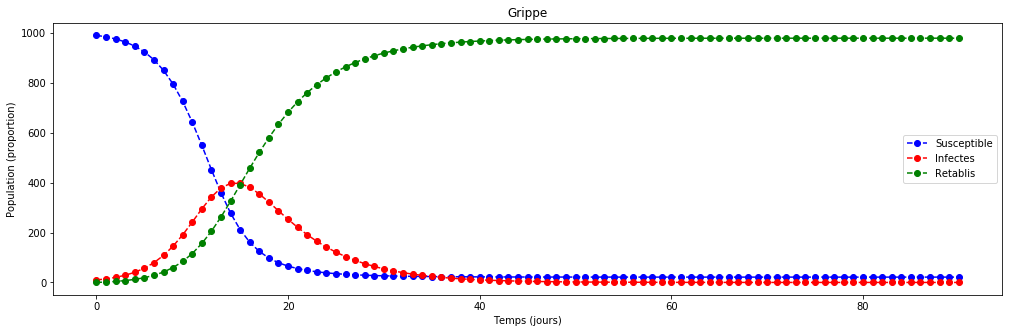

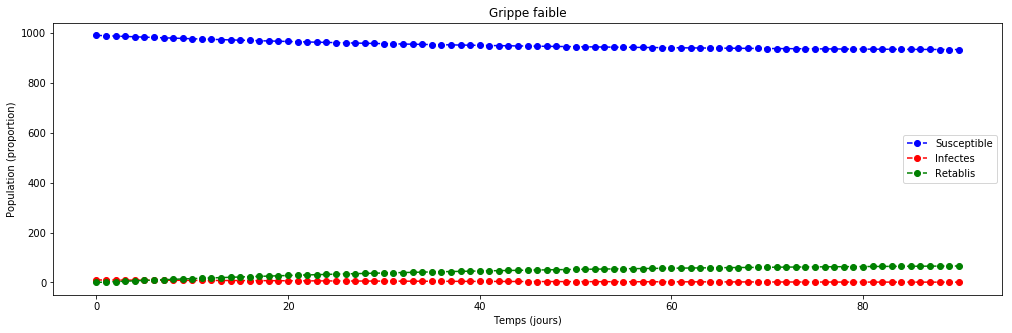

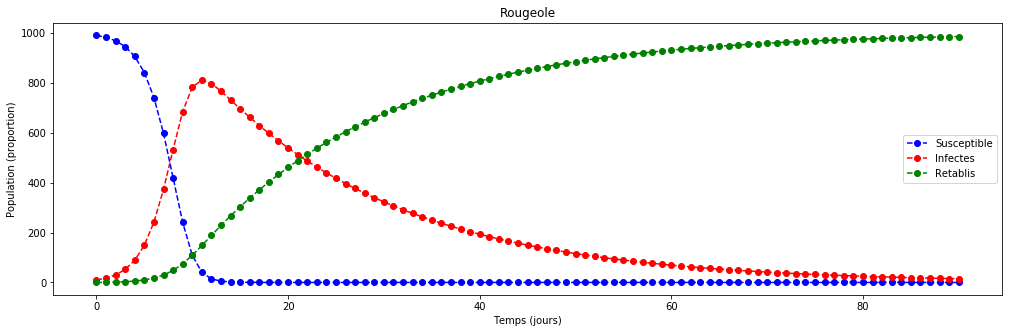

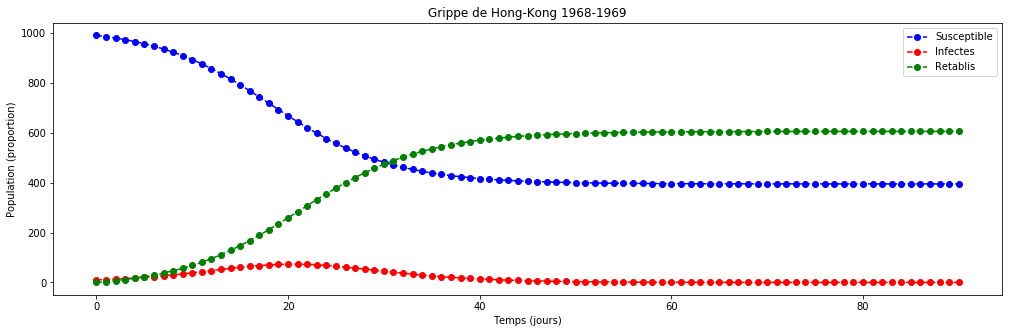

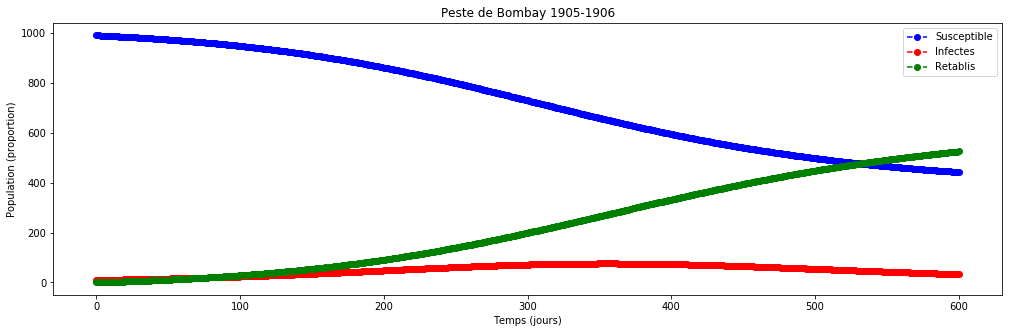

In [61]:
(S1,I1,R1) = discrete_SIR(990,10,0,90,0.6,1.0/6.0)
plot_SIR(S1,I1,R1,'Grippe')

(S2,I2,R2) = discrete_SIR(990,10,0,90,0.15,1.0/6.0)
plot_SIR(S2,I2,R2,'Grippe faible')

(S3,I3,R3) = discrete_SIR(990,10,0,90,0.8,1.0/20.0)
plot_SIR(S3,I3,R3,'Rougeole')

(S4,I4,R4) = discrete_SIR(990,10,0,90,0.5,1.0/3.0)
plot_SIR(S4,I4,R4,'Grippe de Hong-Kong 1968-1969')

(S5,I5,R5) = discrete_SIR(990,10,0,600,0.0273,1.0/56.2)
plot_SIR(S5,I5,R5,'Peste de Bombay 1905-1906')

## La peste d'Eyam

On suppose maintenant que l'on dispose des donnees d'une population victime d'une epidemie, dont on fait l'hypothese qu'elle evolue plus ou moins selon un model SIR, dont on veut estimer les parametres $\beta$ et $\gamma$ que l'on ne connait a priori pas. Le parametre $\gamma$ peut etre obtenu assez facilement en faisant la moyenne du temps durant lequel chaque individu infecte reste malade avant soit de mourir soit de se retablir. On veut donc estimer le parametre $\beta$ a partir de donnees que l'on a pour pouvoir prevoir la dynamique de l'epidemie. Comment proceder pour choisir le meilleur parametre $\beta$. 

Comme application, on prend une peidemie de peste bubonique dans le village anglais d'Eyam, en 1665, annee de la Grande Peste de Londres, une des dernieres epidemies mqjeuresde la seconde pandemie de peste qui a frappe l'Europe a la suite de la Peste Noire du XIVeme siecle et jusqu'au XVIIIeme siecle (Peste de Marseilles en 1720).

| Date de collection des donnees  |Nombre de jours depuis le debut de l'epidemie |Susceptibles | Infectes | 
|-------||-------------|----------|
|June 19 1665|0|254|7| 
|July 3 1665|14|235|14|
|July 19 1665|28|201|22|
|Aug 3 1665|42|153|29|
|Aug 19 1665|56|121| 21|
|Sept 3 1665|70|108|8|
|Sept 19 1665|84|97|21|
|Oct 3 1665| 98|NA | NA|
|Oct 19 1665|112| 83 | 0|

Cette epidemie est interessante car des qu'elle fut detectee, le village d'Eyam s'est ferme, empechant toute entree ou sortie, jusqu'a la fin de l'epidemie. L'hypothese de population constante du modele SIR est donc satisfaite et on peut se poser la question suivante : l'epidemie d'Eyam suit-elle un modele SIR et si oui, pour quelles valeurs de $\beta$ et $\gamma$? Pour $\gamma$ on peut utiliser l'observation que les patients infectes le restent entre 10 et 14 jours (donc $10 \leq \lambda \leq 14$). Pour $\beta$ on ne dispose que des donnees numeriques ci-dessus.

## Activite 2

A partir des informations fournies precedemment, ecrire une fonction *parameters_SIR* qui prend en entree
- S,I,R = trois dictionnaires modelisant l'evolution d'une epidemie,
- t_max = la duree de  l'epidemie
- lambda_min, lambda_max : intervalle des valeurs possibles de $\lambda$ (deux entiers),
- beta_min, beta_max : intervalle des valeurs possibles de $\beta$ (deux reels).
et calcule la valeur des parametres $\beta$ et $\gamma$ d'un modele SIR qui modelise les donnees fournies le plus precisement possible.

In [36]:
# Function computing the least-squares differences between D1 and the corresponding entries in D2
def lsq_dict(D1,D2):
    diff = 0.0
    for k in D1.keys():
        diff += pow(D1[k]-D2[k],2)
    return(m.sqrt(diff))

# Looking for the values of beta and lambda that minimizes the least-squares differences for number of susceptible individuals
def parameters_SIR(S,I,R,t_max,lambda_min,lambda_max,beta_min,beta_max):
    b_step     = 0.025
    S0,I0,R0   = S[0],I[0],R[0]
    best_found = False
    for l in range(lambda_min,lambda_max+1):
        for b in np.arange(beta_min,beta_max+b_step,b_step):
            (S1,I1,R1) = discrete_SIR(S0,I0,R0,t_max,b,1.0/l)
            diff = lsq_dict(S,S1)
            if (not best_found) or diff < best_diff:
                Beta   = b
                Lambda = l
                best_diff = diff
                best_found = True
    return((Beta,Lambda,best_diff))

### Application
Appliquons notre fonction aux donnees d'Eyam.

In [37]:
Eyam_N = 261
Eyam_S = {0:254, 14:235, 28:201, 42:153, 56:121, 70:108, 84:97, 112:83}
Eyam_I = {0:7, 14:14, 28:22, 42:29, 56:21, 70:8, 84:21, 112:0}
Eyam_R = {t:Eyam_N-(Eyam_S[t]+Eyam_I[t]) for t in Eyam_S.keys()}

Valeur de beta = 0.15, valeur de lambda = 11


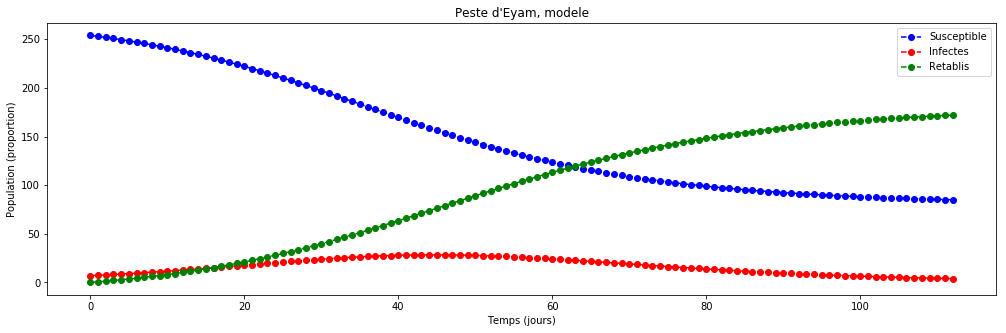

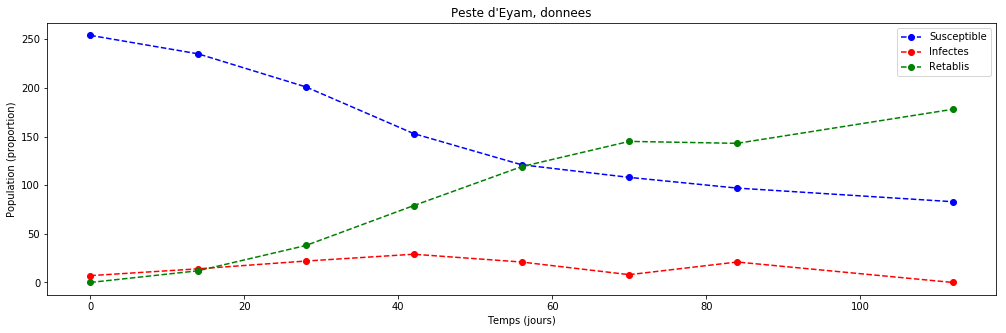

In [62]:
(Eyam_beta,Eyam_lambda,diff) = parameters_SIR(Eyam_S,Eyam_I,Eyam_R,112,10,14,0.1,0.5)
print('Valeur de beta = '+str(Eyam_beta)+', valeur de lambda = '+str(Eyam_lambda))
(Eyam_S1,Eyam_I1,Eyam_R1) = discrete_SIR(Eyam_S[0],Eyam_I[0],Eyam_R[0],112,Eyam_beta,1.0/Eyam_lambda)
plot_SIR(Eyam_S1,Eyam_I1,Eyam_R1,'Peste d\'Eyam, modele')
plot_SIR(Eyam_S,Eyam_I,Eyam_R,'Peste d\'Eyam, donnees')

On voit que les parametres obtenus par notre recherche menent a un modele qui cadre assez bien avec les donnees, malgre un decalage du croisement de la courbe des susceptibles et des retablis.

## Une interface graphique pour le modele SIR

Nous allons maintenant developper une interface graphique pour visualiser un model SIR de type Modele-Vue-Controleur. 

In [194]:
# The model: a class

import traitlets

class SIR_model(traitlets.HasTraits):
    """
    Class to represent an SIR model
    """
    t_max = traitlets.Integer()
    beta  = traitlets.Float()
    gamma = traitlets.Float()
    title = traitlets.Unicode()
    S     = traitlets.Dict()
    I     = traitlets.Dict()
    R     = traitlets.Dict()
            
    def __init__(self):
        self.S[0],self.I[0],self.R[0] = 254,7,0
        self.t_max = 112
        self.beta = 0.15
        self.gamma = 0.09
        self.title = 'Peste d\'Eyam'
        pass
        
    # The observe decorator is used to indicate that the function being
    # decorated should be called if any of the traits listed as arguments
    # change. The decorated function must have an argument named change.
    @traitlets.observe('S[0]','R[0]','I[0]','t_max','beta','gamma')
    def run_SIR(self,change):
        N = self.S[0]+self.I[0]+self.R[0]
    
        # Apply SIR model: iterate over the total number of time points
        for t in range(0,self.t_max):
            self.S[t+1] = self.S[t] - (self.beta*self.S[t]*self.I[t]/N)
            self.I[t+1] = self.I[t] + (self.beta*self.S[t]*self.I[t]/N) - (self.gamma*self.I[t])
            self.R[t+1] = self.R[t] + (self.gamma*self.I[t])

    def plot_SIR(self):
        # Initialize figure
        fig = plt.figure(facecolor='w',figsize=(17,5))
        ax  = fig.add_subplot(111,facecolor = '#ffffff')
    
        # Set x axis
        x = self.S.keys()
   
        # Plot of evolution of susceptible over the course of |x| time points
        plt.plot(x,self.S.values(),'go--',c= 'b',label='Susceptible')
        # Plot of evolution of infected over the course of |x| time points
        plt.plot(x,self.I.values(),'go--',c='r',label='Infectes')
        # Plot of evolution of removed over the course of |x| time points
        plt.plot(x,self.R.values(),'go--',c='g',label='Retablis')

        # Make the plot pretty
        plt.xlabel('Temps (jours)')
        plt.ylabel('Population (proportion)')
        plt.title(self.title)
        legend = ax.legend()
        plt.show()

In [195]:
# The controler
def run_and_plot_SIR(S0,I0,R0,t_max,beta,gamma,title):
    S = SIR_model()
    S.S[0],S.I[0],S.R[0],S.t_max,S.beta,S.gamma,S.title = S0,I0,R0,t_max,beta,gamma,title
    S.plot_SIR()

In [196]:
# The view
from ipywidgets import widgets, interact, interact_manual

# Set function above so that the user can set all parameters and manually start simulation
s = {'description_width': 'initial'}
interact_manual(run_and_plot_SIR,
    S0 = widgets.IntSlider(value = 254, min = 200, max = 1000, step = 1,
                           style=s, description='Susceptibles au temps 0', disabled=False, orientation='horizontal', readout=True),
    I0 = widgets.IntSlider(value = 7, min = 0, max = 500, step = 1,
                           style=s, description='Infectes au temps 0', disabled=False, orientation='horizontal', readout=True),
    R0 = widgets.IntSlider(value = 0, min = 0, max = 500, step = 1, 
                           style=s, description='Retablis au temps 0', disabled=False, orientation='horizontal', readout=True),
    t_max = widgets.IntSlider(value = 112, min = 0, max = 500, step = 1,
                              style=s, description='Temps (jours)', disabled=False, orientation='horizontal', readout=True),
    beta = widgets.FloatText(value=0.15, step=0.01,
                             style=s, description=r'Parametre $ \beta$', disabled=False, readout=True),
    gamma = widgets.FloatText(value=0.09, step=0.01,
                              style=s, description= r'Parametre $ \gamma$', disabled=False, readout=True),
    title = widgets.Text(value='Modele SIR de la peste d\'Eyam', style=s, description= r'Titre', disabled=False)
    );

interactive(children=(IntSlider(value=254, description='Susceptibles au temps 0', max=1000, min=200, style=Sli…